**Prediction using Supervised ML**

What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#Lets import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#we take the data set from the given url directly
url = 'https://bit.ly/3kXTdox'
#now lets use the url to load the data

students = pd.read_csv("/content/student_scores - student_scores.csv")


In [4]:
#Lets do the data preprocessing
#lets check for the missing value if any
students.isna().sum()

Hours     0
Scores    0
dtype: int64

In [5]:
#Lets check the describtion of the data set
#it will give the count, mean, standard deviation etc.
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
#Shape of the given data set, info etc.
students.shape

(25, 2)

In [7]:
students.info

<bound method DataFrame.info of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

(array([3., 4., 3., 1., 3., 2., 1., 2., 3., 3.]),
 array([1.1 , 1.91, 2.72, 3.53, 4.34, 5.15, 5.96, 6.77, 7.58, 8.39, 9.2 ]),
 <a list of 10 Patch objects>)

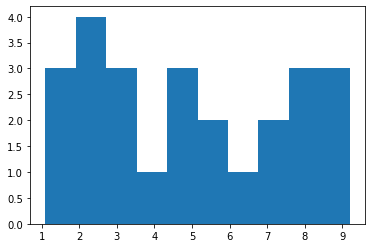

In [8]:
#lets check for the Visualization
#Histogram
plt.hist(students.Hours)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

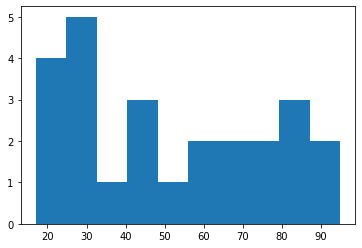

In [9]:
plt.hist(students.Scores)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


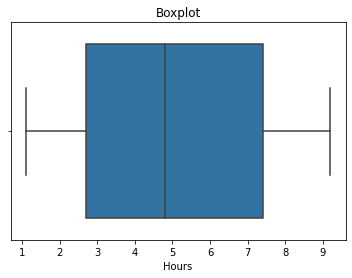

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


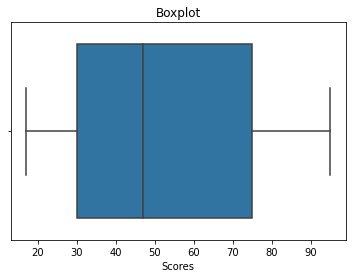

In [10]:
#lets check for the outliers or boxplots
sns.boxplot(students.Hours);plt.title('Boxplot');plt.show()
sns.boxplot(students.Scores);plt.title('Boxplot');plt.show()
#So, the boxplot shows there are no outliers present in the given data set attributes


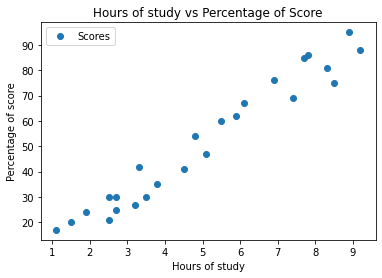

In [11]:
#Lets plot the graph hours vs scores
students.plot(x='Hours', y='Scores', style='o');plt.title('Hours of study vs Percentage of Score');plt.xlabel('Hours of study');plt.ylabel('Percentage of score');plt.show()


In [12]:
#Lets select a y as a target Scores attributes
X = students.iloc[:,:-1] #Hours
y = students.iloc[:,1] #Scores

In [13]:
#lets split a data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state=0)


In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

#lets use the train data for the algorithm to train
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

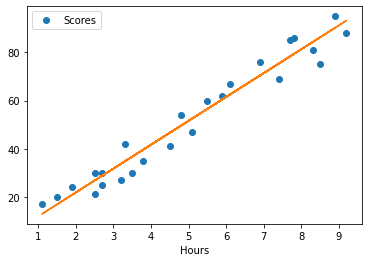

In [15]:
#If we use the QQplot then the a linear line will come in between the graph
qqline = lr.coef_*X+lr.intercept_

students.plot(x='Hours', y='Scores', style='o')
plt.plot(X,qqline);plt.show()

In [16]:
#Now as the linear model is built
#lets start the prediction
#based on the test data
y_pred = lr.predict(X_test)

In [17]:
#Now lets check the comparison of Actual i.i. y_test and predicted value

pro = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred})


In [18]:
#Now as per the given conditons lets check for the 9.25 hours per day
#lets you formate function for the resultant

hours = 9.25
predictions = lr.predict([[hours]])

print('Number of hours study per day :{}'.format(hours))
print('Predicted Score as per the hours of study :{}'.format(predictions[0]))


Number of hours study per day :9.25
Predicted Score as per the hours of study :93.69173248737539
